# Lời giải

In [10]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np

In [14]:
# Blur bằng GaussianBlur rồi phát hiện biên bằng Canny
# Output: Ảnh biên Canny
def canny_edge_detection(image_path, blur_ksize=7, threshold1=10, threshold2=200):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gaussian = cv2.GaussianBlur(gray,(blur_ksize,blur_ksize),0)

    img_canny = cv2.Canny(img_gaussian,threshold1,threshold2)
    return img_canny

In [15]:
# Output: số đo độ của góc hoặc True(Song song)/False(Không song song) tùy vào tham số check_parallel truyền vào
def angle_between_objects(image_path, threshold_angle=0.1, check_parallel=False):
  # Phát hiện biên bằng Canny
  img_canny = canny_edge_detection(image_path)

  # Phát hiện đường thẳng bằng Hough Transform
  lines = cv2.HoughLines(img_canny, 1, np.pi / 180, 150, None, 0, 0)

  # Chia các đường thẳng thành 2 nhóm ứng với 2 object dựa vào độ lệch giữa các góc (so sánh với ngưỡng threshold_angle truyền vào)
  object1_edge_angle = []
  object2_edge_angle = []
  if lines is not None:
    for i in range(0, len(lines)):
      if i==0:
        object1_edge_angle.append(lines[i][0][1])
      else:
        if np.abs(lines[i][0][1] - object1_edge_angle[0]) > threshold_angle:
          object2_edge_angle.append(lines[i][0][1])
        else:
          object1_edge_angle.append(lines[i][0][1])
  
  # Check song song nếu độ lệch là không đáng kể
  if check_parallel:
    if len(object2_edge_angle)==0:
      return True
    else:
      return False
  else:
    # Song song thì trả về 0 độ
    if len(object2_edge_angle) == 0:
      return 0
    else:
      # Tính góc bằng hiệu số góc giữa trung bình cộng của 2 nhóm đường thẳng và chuyển về số đo độ
      angle = np.round(np.abs(np.mean(object1_edge_angle)-np.mean(object2_edge_angle))*180/np.pi)
      # Chỉ lấy góc bé hơn 90 độ
      if angle < 90:
        return int(angle)
      else:
        return int(180-angle)

In [16]:
print(angle_between_objects('img1.png'), "độ")
print(angle_between_objects('img2.png'), "độ")
print(angle_between_objects('img3.png'), "độ")
print(angle_between_objects('img4.png'), "độ")

55 độ
39 độ
21 độ
0 độ


In [21]:
if angle_between_objects('img4.png', check_parallel=True):
  print("Song Song")
else:
  print("Ko song song")

Song Song


# Giải thích

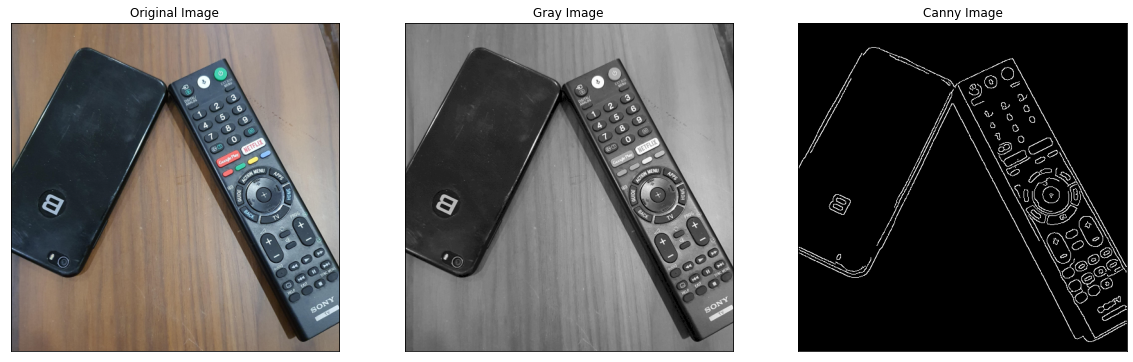

In [22]:
image_path = 'img.png'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.imread(image_path, 0)
img_canny = canny_edge_detection(image_path, 7, 10, 200)

plt.figure(figsize=(20,20))
plt.subplot(131),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(gray, cmap = 'gray')
plt.title('Gray Image'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_canny,cmap = 'gray')
plt.title('Canny Image'), plt.xticks([]), plt.yticks([])
plt.show()

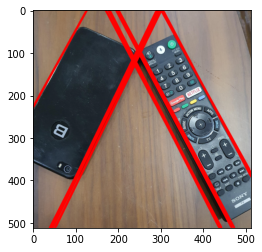

In [23]:
lines = cv2.HoughLines(img_canny, 1, np.pi / 180, 150, None, 0, 0)
# Draw the lines
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(img, pt1, pt2, (255,0,0), 3, cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [24]:
lines

array([[[-263.        ,    2.6354473 ]],

       [[-151.        ,    2.6529005 ]],

       [[-172.        ,    2.6529005 ]],

       [[-177.        ,    2.6529005 ]],

       [[ 267.        ,    0.47123888]],

       [[ 270.        ,    0.4537856 ]],

       [[-158.        ,    2.6703537 ]],

       [[ 265.        ,    0.4537856 ]],

       [[ 261.        ,    0.4537856 ]],

       [[-160.        ,    2.6703537 ]],

       [[-269.        ,    2.6529005 ]],

       [[ 110.        ,    0.5061455 ]]], dtype=float32)

In [25]:
object1_edge_angle = []
object2_edge_angle = []
if lines is not None:
    for i in range(0, len(lines)):
        if i==0:
          object1_edge_angle.append(lines[i][0][1])
        else:
          if np.abs(lines[i][0][1] - object1_edge_angle[0]) > 0.1:
            object2_edge_angle.append(lines[i][0][1])
          else:
            object1_edge_angle.append(lines[i][0][1])
print(object1_edge_angle)
print(object2_edge_angle)

[2.6354473, 2.6529005, 2.6529005, 2.6529005, 2.6703537, 2.6703537, 2.6529005]
[0.47123888, 0.4537856, 0.4537856, 0.4537856, 0.5061455]


In [26]:
np.round(np.abs(np.mean(object1_edge_angle)-np.mean(object2_edge_angle))*180/np.pi)

125.0